--- Winner Type Distribution ---
winner_type
not tie    2575
tie         780
Name: count, dtype: int64
------------------------------


C:\Users\micro\AppData\Local\Temp\ipykernel_5700\3874114893.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="winner_type", palette="Set2", order=["not tie", "tie"])


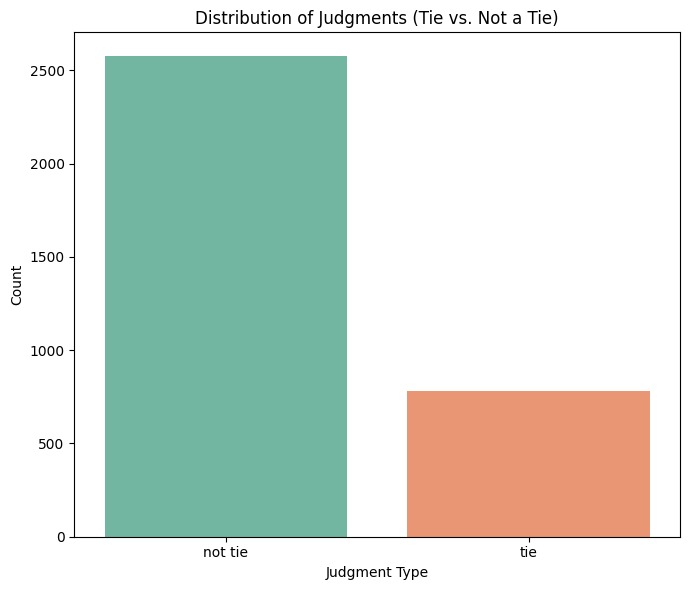


--- Total Model Appearances (in model_a or model_b) ---
gpt-3.5-turbo      1478
vicuna-13b-v1.2    1106
llama-13b          1083
gpt-4              1029
alpaca-13b         1018
claude-v1           996
Name: count, dtype: int64
------------------------------


C:\Users\micro\AppData\Local\Temp\ipykernel_5700\3874114893.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_model_counts.index, y=total_model_counts.values, palette="viridis")


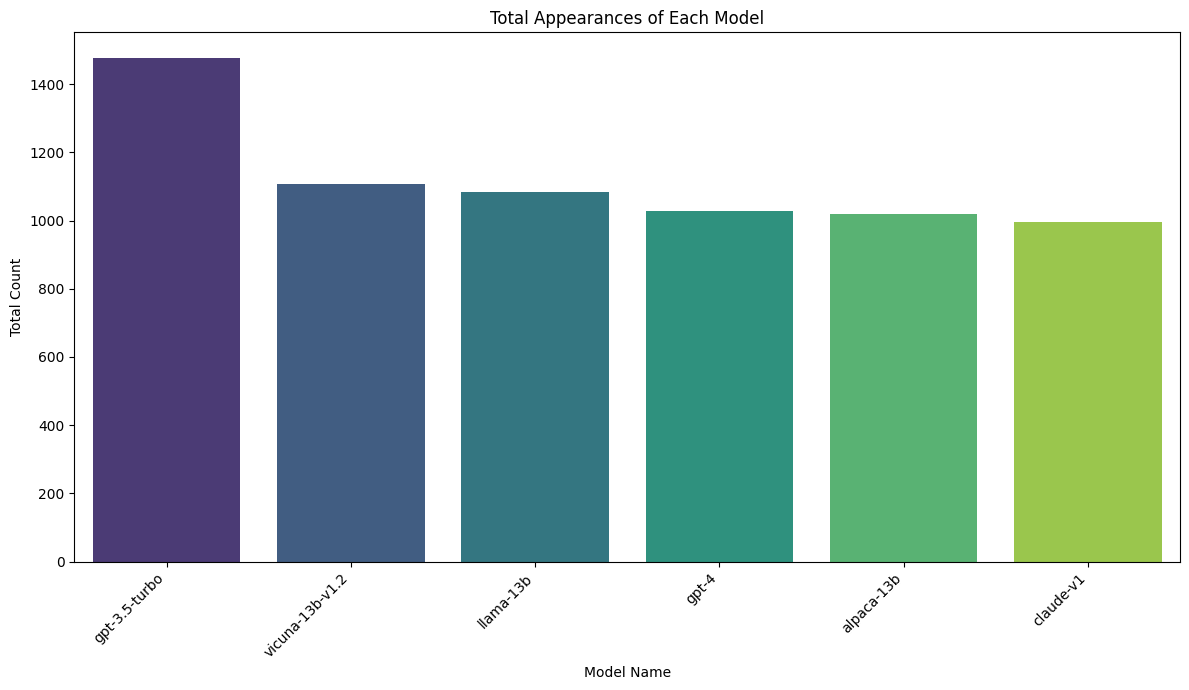

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input CSV (produced from your JSONL → CSV script)
# You might need to replace this with the actual path to your CSV file.
INPUT_FILE = "mt_bench_human_judgements.csv"


"""
Performs Exploratory Data Analysis on the MT-Bench dataset.

Args:
    input_file (str): Path to the input CSV file.
"""
try:
    # Load the CSV
    df = pd.read_csv(INPUT_FILE)
except FileNotFoundError:
    print(f"Error: The file '{INPUT_FILE}' was not found.")
    print("Please make sure the CSV file is in the same directory or provide the full path.")
    # Create a dummy dataframe to avoid crashing the rest of the script
    # In a real scenario, you might want to exit or handle this differently.
    print("Creating a dummy dataframe for demonstration purposes.")
    dummy_data = {
        'model_a': ['gpt-4', 'gpt-3.5-turbo', 'claude-1', 'gpt-4'],
        'model_b': ['claude-1', 'gpt-4', 'gpt-3.5-turbo', 'claude-1'],
        'winner': ['model_a', 'tie', 'model_b', 'model_a']
    }
    df = pd.DataFrame(dummy_data)


# --- EDA Part 1: Distribution of Winner Types (Existing Code) ---

# Create a new column: "winner_type" → tie / not tie
df["winner_type"] = df["winner"].apply(
    lambda x: "tie" if str(x).strip().lower() == "tie" else "not tie"
)

# Count distribution
winner_counts = df["winner_type"].value_counts()
print("--- Winner Type Distribution ---")
print(winner_counts)
print("-" * 30)


# Plot winner distribution
plt.figure(figsize=(7, 6))
sns.countplot(data=df, x="winner_type", palette="Set2", order=["not tie", "tie"])
plt.title("Distribution of Judgments (Tie vs. Not a Tie)")
plt.xlabel("Judgment Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# --- EDA Part 2: Model Appearance Frequency (New Code) ---

# Count occurrences in model_a and model_b columns separately
model_a_counts = df["model_a"].value_counts()
model_b_counts = df["model_b"].value_counts()

# Combine the counts of both columns. fill_value=0 handles models that
# might appear in one column but not the other.
total_model_counts = model_a_counts.add(model_b_counts, fill_value=0).astype(int)
total_model_counts = total_model_counts.sort_values(ascending=False)

print("\n--- Total Model Appearances (in model_a or model_b) ---")
print(total_model_counts)
print("-" * 30)

# Plot model appearance frequency
plt.figure(figsize=(12, 7))
sns.barplot(x=total_model_counts.index, y=total_model_counts.values, palette="viridis")
plt.title("Total Appearances of Each Model")
plt.xlabel("Model Name")
plt.ylabel("Total Count")
plt.xticks(rotation=45, ha="right") # Rotate labels for better readability
plt.tight_layout()
plt.show()



In [6]:
# EDA on training script
try:
    df_train = pd.read_csv("mt_bench_training.csv")
    print(df_train['winner'].value_counts(normalize=True))
except FileNotFoundError:
    print("Training CSV file not found. Skipping training data EDA.")

winner
gpt-3.5-turbo      0.281016
gpt-4              0.209190
claude-v1          0.185006
vicuna-13b-v1.2    0.163966
alpaca-13b         0.098428
llama-13b          0.062394
Name: proportion, dtype: float64
